In [169]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [170]:
#import the dataset
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [171]:
df.shape

(13320, 9)

In [172]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [173]:
#dropping unnecessary attributes 
df1 = df.drop(['area_type','availability','society'],axis='columns')
df1.shape

(13320, 6)

In [174]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [175]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [176]:
df2.shape

(12710, 6)

In [177]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [178]:
df2['bhk']= df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.bhk.unique()

<ipython-input-178-0615e75ab10c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']= df2['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [179]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [180]:
#dropping attributes 
df2.drop(['size','balcony'],axis='columns',inplace=True)
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


Exploring total_sqft

In [181]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [182]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4
772,Banashankari Stage VI,1160 - 1195,2.0,59.935,2


Handling special cases in total_sqft

In [183]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [184]:
df2.total_sqft = df2.total_sqft.apply(lambda x: convert_sqft_to_num(x))
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [185]:
df2.loc[122]

location      Hebbal
total_sqft    5611.5
bath             4.0
price          477.0
bhk                4
Name: 122, dtype: object

In [186]:
df2.loc[410]

location      Kengeri
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

Calculating the price_per_sqft

In [187]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [188]:
df3.location = df3.location.apply(lambda x: x.strip())
location = df3['location'].value_counts(ascending=False)
location

Whitefield                         515
Sarjapur  Road                     372
Electronic City                    302
Kanakpura Road                     261
Thanisandra                        234
                                  ... 
t.c palya                            1
Whietfield,                          1
Uvce Layout                          1
Hommadevanahalli                     1
beml layout, basaveshwara nagar      1
Name: location, Length: 1254, dtype: int64

In [230]:
len(location[location>15])

173

In [231]:
len(location[location<=15])

1081

In [232]:
location_stats_less_than_15 = location[location<=15]
location_stats_less_than_15

Kasturi Nagar                      15
Arekere                            15
Chamrajpet                         15
Kenchenahalli                      15
Mallasandra                        15
                                   ..
t.c palya                           1
Whietfield,                         1
Uvce Layout                         1
Hommadevanahalli                    1
beml layout, basaveshwara nagar     1
Name: location, Length: 1081, dtype: int64

In [234]:
df3.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,70.00,3,3888.888889
11,Whitefield,2785.0,5.0,295.00,4,10592.459605
12,7th Phase JP Nagar,1000.0,2.0,38.00,2,3800.000000


Outlier Removal

In [235]:
df3[df3.total_sqft/df3.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Double Road,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,160.0,6,22535.211268


In [236]:
df4 = df3[~(df3.total_sqft/df3.bhk<300)]
df4.shape

(12055, 6)

In [245]:
df4.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [246]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_outliers(df4)
df5.shape

(8914, 6)

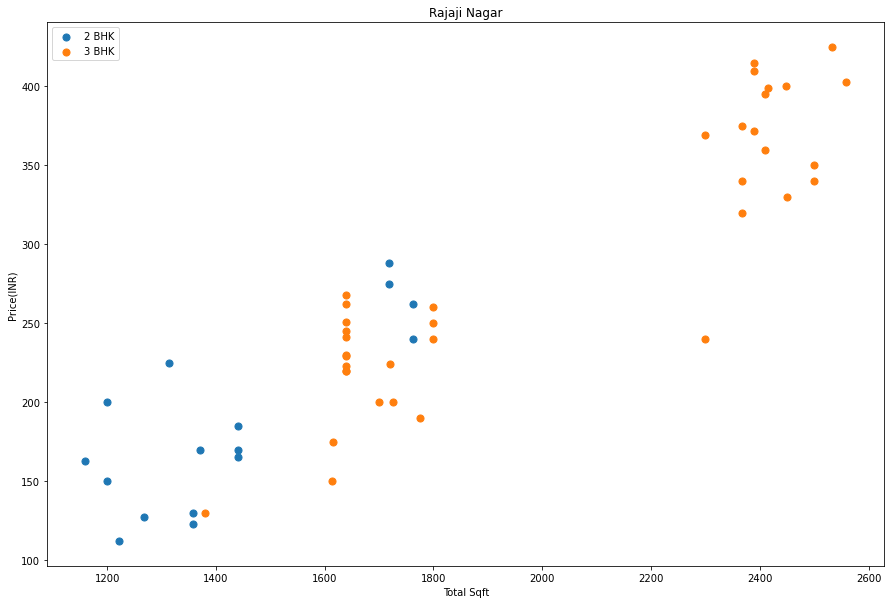

In [244]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,label='3 BHK', s=50)
    plt.xlabel("Total Sqft")
    plt.ylabel("Price(INR)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df5,"Rajaji Nagar")

In [240]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)

df6.shape

(7200, 6)

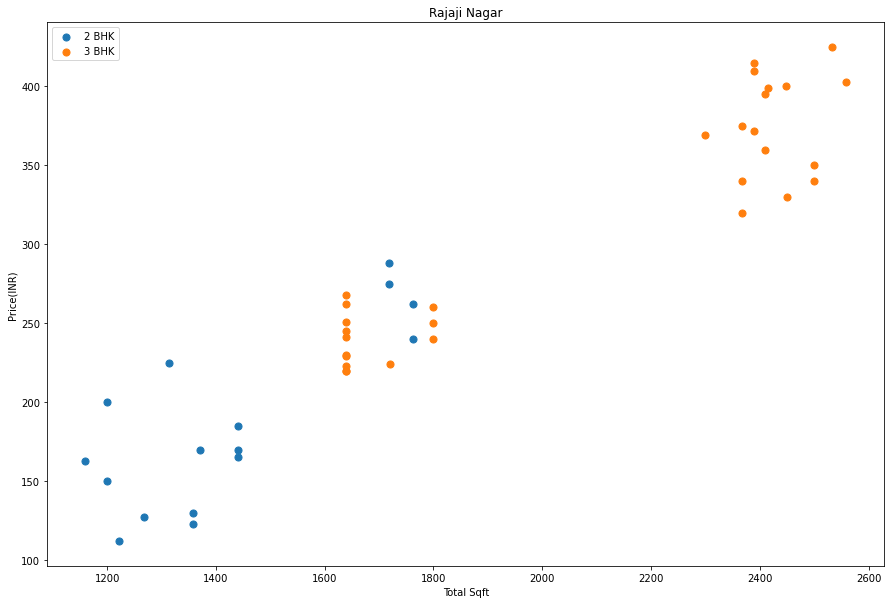

In [247]:
plot_scatter_chart(df6,"Rajaji Nagar")

Text(0, 0.5, 'Count')

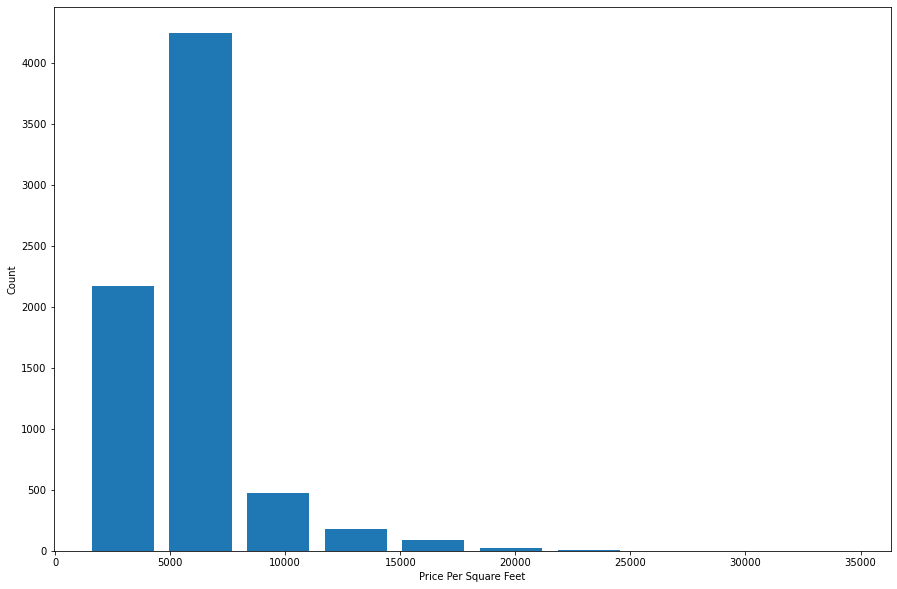

In [242]:
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [248]:
df6.bath.unique()

array([3., 1., 4., 2., 5., 8., 6., 7., 9.])

Text(0, 0.5, 'Count')

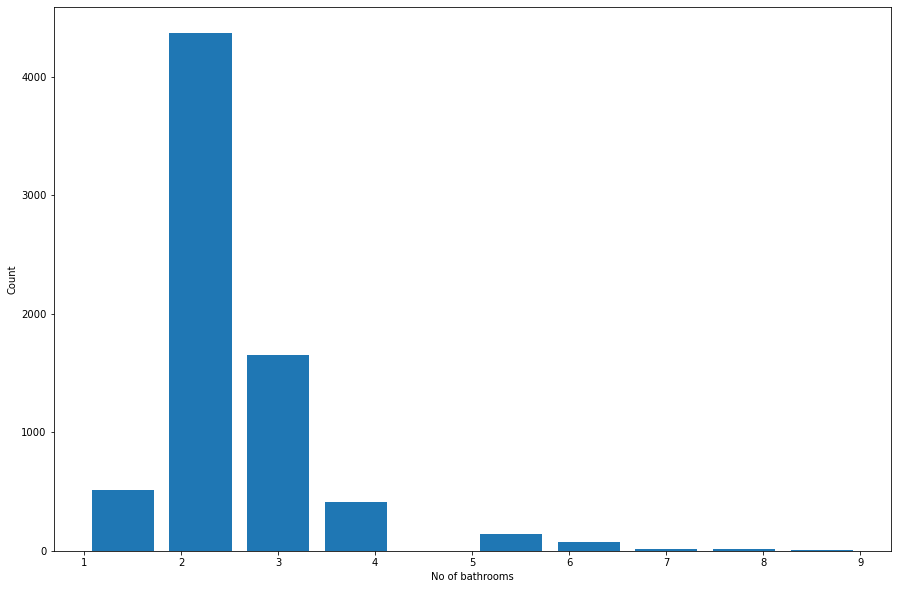

In [249]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("No of bathrooms")
plt.ylabel("Count")

In [254]:
df6[df6.bath>5]

,location,total_sqft,bath,price,bhk,price_per_sqft
56,2nd Stage Nagarbhavi,3000.0,8.0,451.0,6,15033.333333
57,2nd Stage Nagarbhavi,2400.0,8.0,450.0,6,18750.000000
61,3rd Block Banashankari,2400.0,8.0,650.0,6,27083.333333
237,8th Block Jayanagar,2000.0,6.0,300.0,6,15000.000000
344,Abbigere,2200.0,6.0,68.0,6,3090.909091
...,...,...,...,...,...,...
8067,Vijayanagar,2100.0,6.0,252.0,4,12000.000000
8070,Vijayanagar,2400.0,6.0,125.0,5,5208.333333
8088,Vishveshwarya Layout,2100.0,6.0,92.0,6,4380.952381
8399,Whitefield,4003.0,6.0,300.0,4,7494.379216


In [255]:
df6[df6.bath>df6.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1858,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
7124,Sathya Sai Layout,11338.0,9.0,1000.0,6,8819.897689
7597,Thanisandra,1806.0,6.0,116.0,3,6423.034330


In [256]:
df7 = df6[df6.bath<df6.bhk+2]
df7.shape

(7132, 6)

In [257]:
df7.head(2)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block BEL Layout,1540.0,3.0,85.0,3,5519.480519
1,1st Block HBR Layout,600.0,1.0,45.0,1,7500.000000


In [269]:
dummies = pd.get_dummies(df7.location)
dummies.head()

,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Phase JP Nagar,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,frazertown,manyata park,south,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
df8 = pd.concat([df7,dummies.drop(['frazertown','manyata park','south','tc.palya'],axis='columns')],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,...,Whitefield,"Whitefield,",Wilson Garden,Yarandahalli,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1st Block BEL Layout,1540.0,3.0,85.0,3,5519.480519,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block HBR Layout,600.0,1.0,45.0,1,7500.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block HBR Layout,3150.0,4.0,150.0,4,4761.904762,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block HRBR Layout,1250.0,2.0,67.0,2,5360.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [279]:
df9 = df8.drop('location',axis='columns')
df9.head(2)

,total_sqft,bath,price,bhk,price_per_sqft,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,...,Whitefield,"Whitefield,",Wilson Garden,Yarandahalli,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1540.0,3.0,85.0,3,5519.480519,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,1.0,45.0,1,7500.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Model Buliding 

In [289]:
X = df9.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,price_per_sqft,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Whitefield,"Whitefield,",Wilson Garden,Yarandahalli,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,1540.0,3.0,3,5519.480519,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600.0,1.0,1,7500.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3150.0,4.0,4,4761.904762,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [290]:
Y = df9.price
Y.head(3)

0     85.0
1     45.0
2    150.0
Name: price, dtype: float64

In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [292]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

-4397561254318.1055